(2866, 2944)


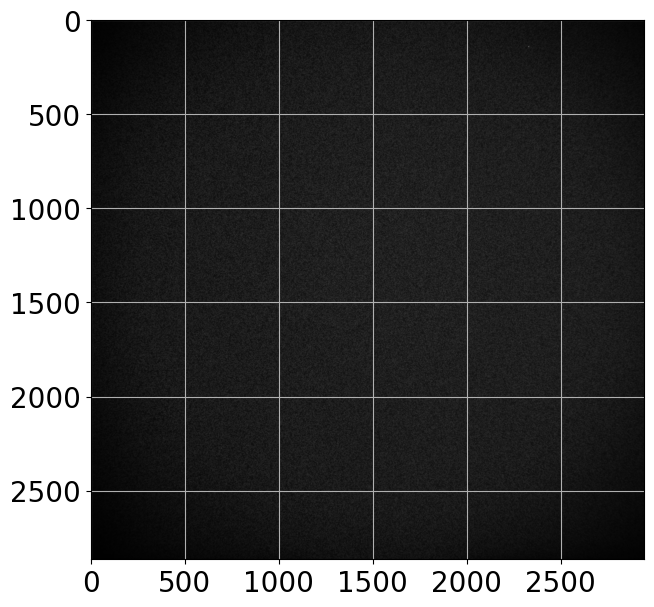

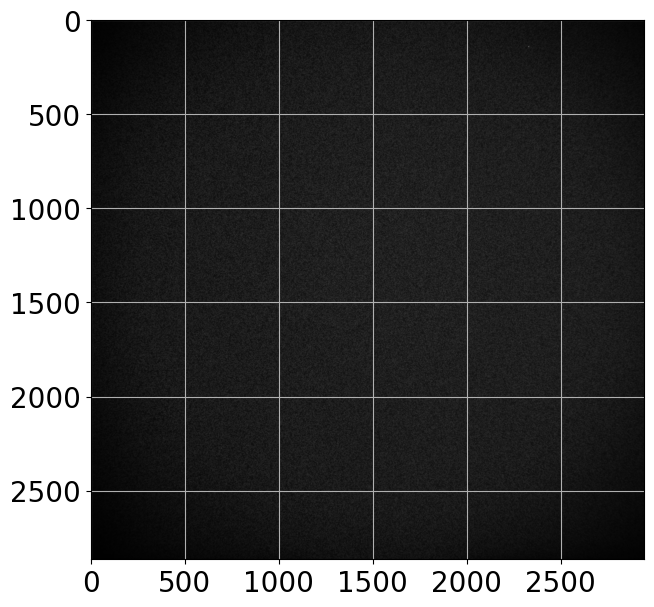

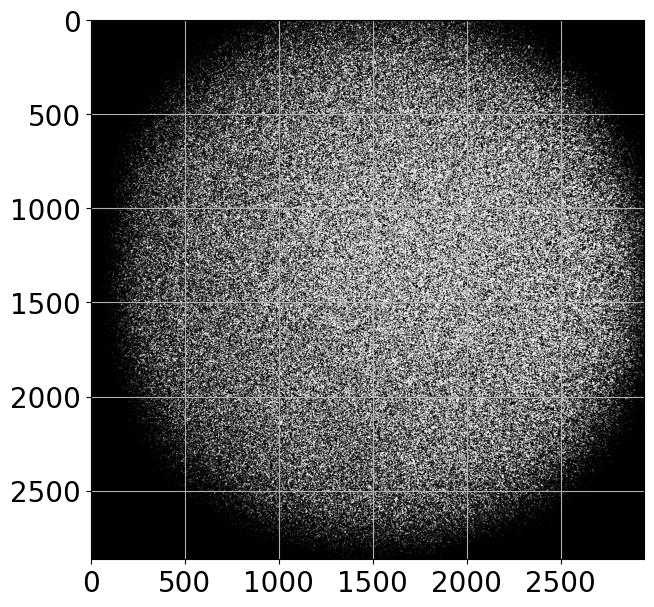

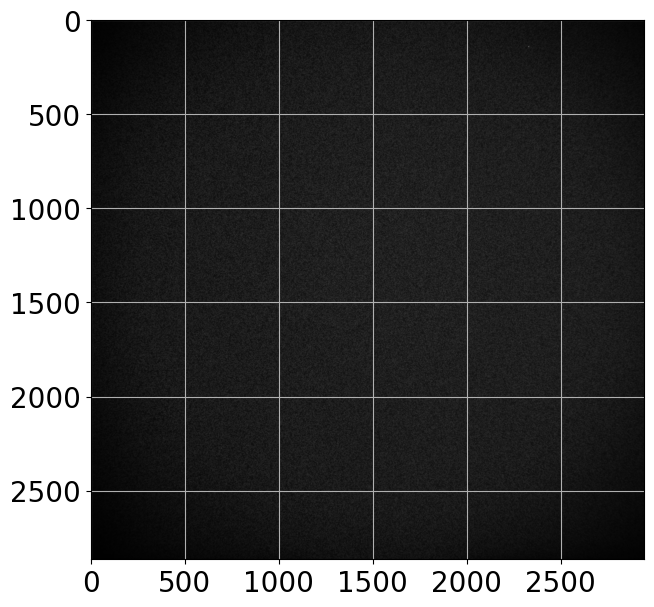

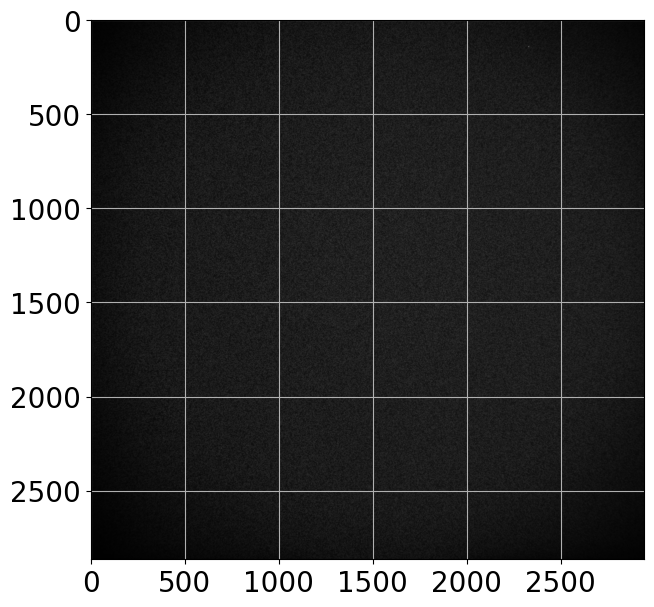

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2
import scipy
from skimage import color, data, restoration
from scipy.signal import convolve2d
import sporco
import skimage 
from scipy import ndimage
from skimage import measure
import matlab
import matlab.engine 
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl
#import htmlPy
import eel
from skimage.metrics import structural_similarity
from skimage.metrics import mean_squared_error

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


def gamma_trans(img,gamma):
    # Конкретный метод сначала нормализуется до 1, а затем гамма используется в качестве значения индекса, чтобы найти новое значение пикселя, а затем восстановить
    gamma_table = [np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    # Реализация сопоставления использует функцию поиска в таблице Opencv
    return cv2.LUT(img0,gamma_table)






import numpy as np
from numpy.fft import fft2, ifft2

def wiener_filter(img, kernel, K = 10):
    dummy = np.copy(img)
    kernel = np.pad(kernel, [(0, dummy.shape[0] - kernel.shape[0]), (0, dummy.shape[1] - kernel.shape[1])], 'constant')
    # Fourier Transform
    dummy = fft2(dummy)
    kernel = fft2(kernel)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return np.uint8(dummy)


def main():
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1102_c.jpg",0)
    #image=scipy.signal.wiener(image)
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    image1=(image-image.mean())/image.std()
    plt.figure(figsize=(15,7))
    plt.imshow(image1,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_czscore.jpg",image1)
    eng = matlab.engine.start_matlab()
    image12 = eng.imadjust(image1,eng.stretchlim(image1),[])
    image12=np.asarray(image12)
    plt.figure(figsize=(15,7))
    plt.imshow(image12,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_czscoreimadjuststretchlim.jpg",image12)
    
    
    image2=np.fft.ifftn(np.log(np.fft.fftn(image)))
    image2.real=(image2.real-image2.real.mean())
    image2=np.fft.ifftn(np.exp(np.fft.fftn(image2)))
    image2=np.real(image2)
    plt.figure(figsize=(15,7))
    plt.imshow(image2,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_cceps.jpg",image2)
    
    image1=(image-image.mean())
    image3=np.fft.ifftn(np.log(np.fft.fftn(image1)))
    image3.real=(image3.real-image3.real.mean())
    image3=np.fft.ifftn(np.exp(np.fft.fftn(image3)))
    image3=np.real(image3)
    plt.figure(figsize=(15,7))
    plt.imshow(image2,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_czs cconstceps.jpg",image3)
    
    ''''
    image31 = eng.imadjust(image3)
    image31=np.asarray(image31)
    plt.figure(figsize=(15,7))
    plt.imshow(image31,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_cconstcepsimadjusts.jpg",image31)
    '''
    
    
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()